# Final Project Submission

Please fill out:
* Student name: Alejandro Harrison 
* Student pace: Self Paced
* Scheduled project review date/time: June 1, 10am
* Instructor name: Claude Fried
* Blog post URL: https://dev.to/crazyjandro/data-science-and-depression-10pf


## Introduction

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. We are charged with exploring what types of films are currently doing the best at the box office, and must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. 

While combing through movie datasets from Box Office Mojo, IMDB, and The Numbers, three factors were identified and focused on that help determine a movie's success in the box office:

* Genre of movie
* Production budget of film
* Building on nostalgia or sequels

## 1. Genre

Let's start off by looking at the IMDB database, which contains over 85,000 movies along with their ratings, number of people who voted on the rating, movie director, etc. 


In [1]:
import pandas as pd
import sqlite3

#Open up a connection to the database
conn = sqlite3.connect("im.db")

In [2]:
#We really only want to focus on genre, rating, and number of votes but we'll also include things like movie title, director 
#and start year.

#Let's join together some of the databases to turn all of our data into one readable table, as well as convert to a DF 
#to make it more easy to manipulate.
#In this SQL query, we're looking at the top 50 movies that have a greater or equal rating of 8, and
#have the most votes.

movies_df = pd.read_sql("""
        SELECT primary_title, original_title, start_year, genres, averagerating, numvotes,primary_name 
        FROM movie_basics
        JOIN movie_ratings
        USING(movie_id)
        JOIN directors
        USING(movie_id)
        JOIN persons
        USING(person_id)
        WHERE averagerating >= 8
        ORDER BY numvotes DESC;
        """,conn
)

#Rename a column to make it more readable
movies_df.rename(columns = {'primary_name':'Director'}, inplace = True)

#We'll look through the DF for duplicate titles and remove, otherwise our data will not be accurate.
movies_df.drop_duplicates(subset = ['primary_title']).reset_index(drop = True).head(50)

,primary_title,original_title,start_year,genres,averagerating,numvotes,Director
0,Inception,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066,Christopher Nolan
1,The Dark Knight Rises,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769,Christopher Nolan
2,Interstellar,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334,Christopher Nolan
3,Django Unchained,Django Unchained,2012,"Drama,Western",8.4,1211405,Quentin Tarantino
4,The Avengers,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655,Joss Whedon
5,The Wolf of Wall Street,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358,Martin Scorsese
6,Shutter Island,Shutter Island,2010,"Mystery,Thriller",8.1,1005960,Martin Scorsese
7,Guardians of the Galaxy,Guardians of the Galaxy,2014,"Action,Adventure,Comedy",8.1,948394,James Gunn
8,Deadpool,Deadpool,2016,"Action,Adventure,Comedy",8.0,820847,Tim Miller
9,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,"Action,Adventure,Fantasy",8.0,784780,J.J. Abrams


As we can see, most of these top rated/voted movies are in the Action or Adventure genre, which when we do further research is no coincidence. As it turns out, the top movie genre in the US is Adventure, followed by Action. Below is a visual representation of how the genres were split in our data.

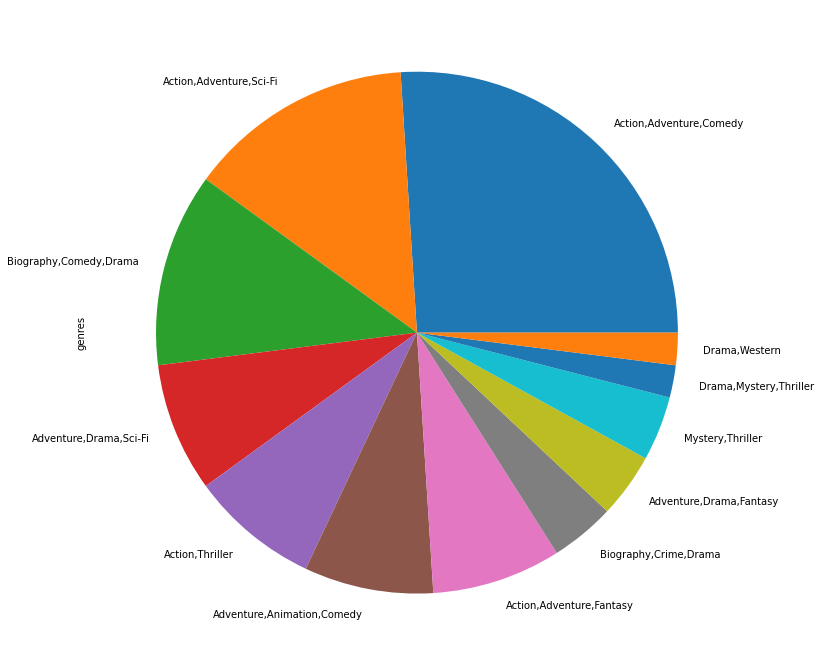

In [3]:
#Create a pie chart for movie genre
movies_df['genres'].head(50).value_counts().plot.pie(figsize = (12,12));

The trend continues for top 100 movies, top 200, etc.

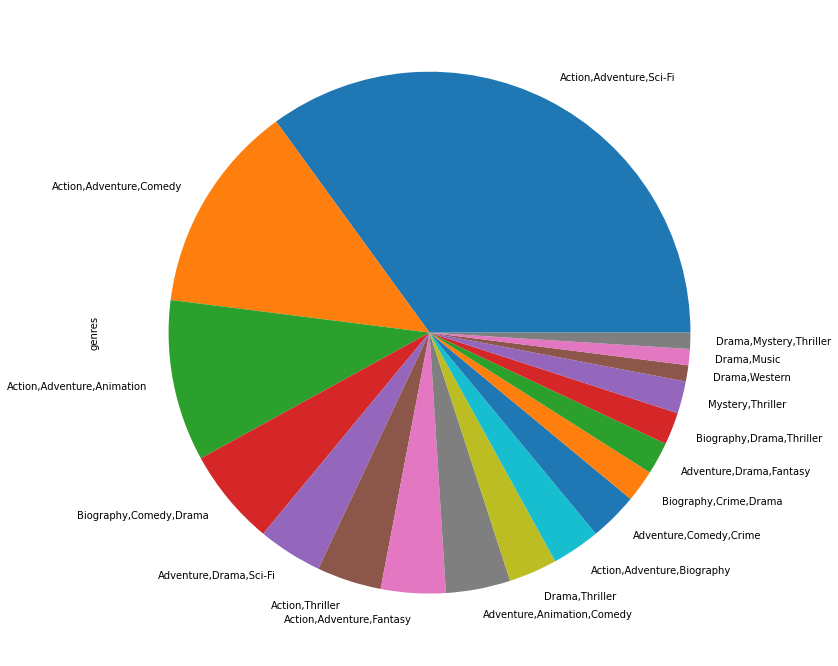

In [4]:
#Top 100 rated/voted on movies
movies_df['genres'].head(100).value_counts().plot.pie(figsize = (12,12));

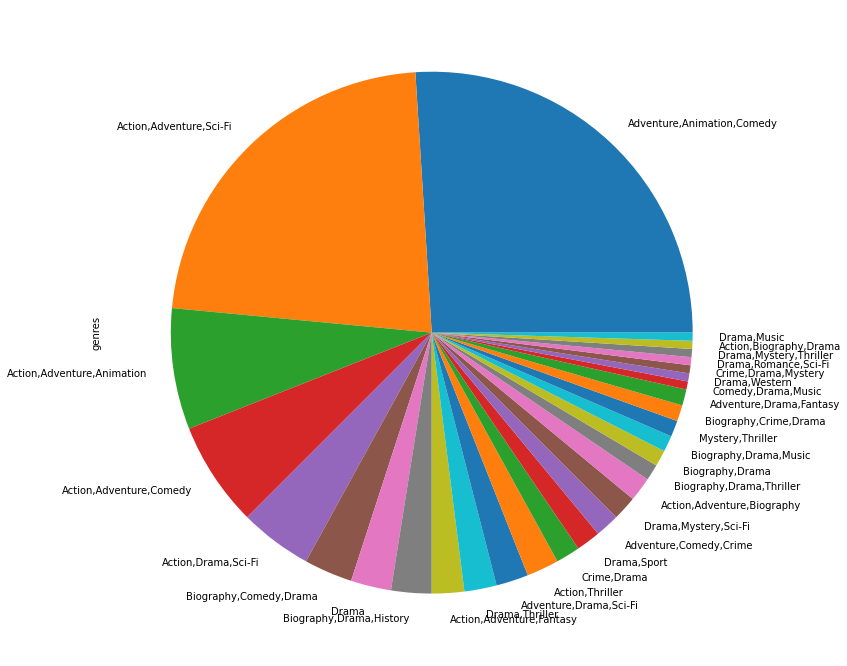

In [5]:
#Top 200 top rated/voted on movies
movies_df['genres'].head(200).value_counts().plot.pie(figsize = (12,12));

Next, let's look at how production budget is related to gross box office.

## 2. Production Budget

Production cost can include things like paying crew and cast, post production editing ,filming and equipment costs, marketing for the movie, etc. I wanted to see if there was any relationship between production budget and box office earnings. Luckily I had just the dataset (from The Numbers) to answer that question. The dataset was full of various movies and also contained their production budget as well as domestic and global box office earnings for each respesctive movie. I then was able to run a Pearson's correlation between production budget and gross box office earnings (both domestic and foreign). Let's look at the results below.

In [6]:
#Let's open the dataset
df_budget = pd.read_csv('tn.movie_budgets.csv')
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
#First let's do some cleanup
#Let's get rid of the dollar signs and commas in the column values
df_budget['production_budget'] = df_budget['production_budget'].str.replace('$','')
df_budget['production_budget'] = df_budget['production_budget'].str.replace(',','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace('$','')
df_budget['domestic_gross'] = df_budget['domestic_gross'].str.replace(',','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace('$','')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].str.replace(',','')


#Now let's convert the strings to ints
df_budget['production_budget'] = df_budget['production_budget'].astype(str).astype('int')
df_budget['domestic_gross'] = df_budget['domestic_gross'].astype(str).astype('int')
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(str).astype('int64')


#Looking at our cleaned up DF
df_budget.head(50)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923


The correlation coefficient between Production budget and worldwide box office is: 0.7483059765694753
The correlation coefficient between Production budget and domestic box office is: 0.6856818396752733


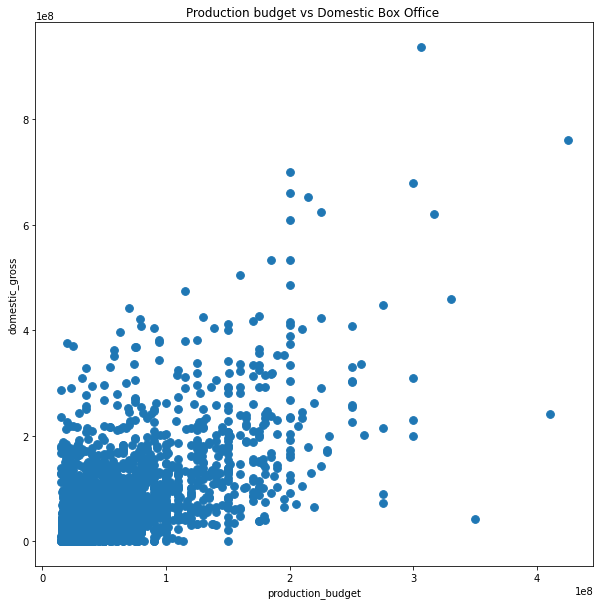

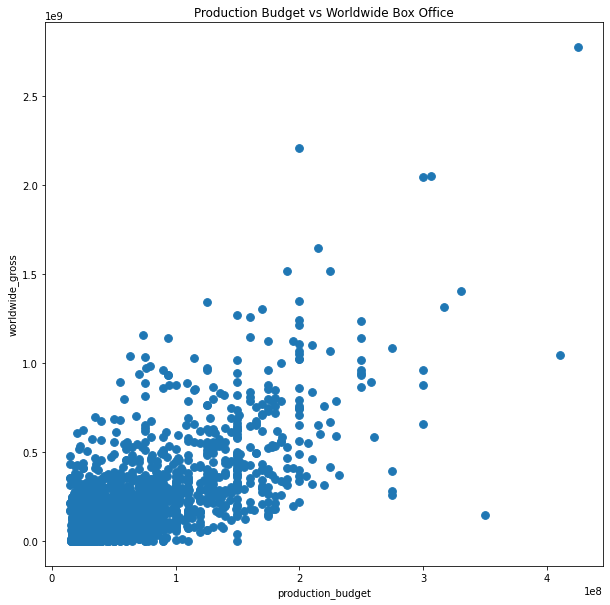

In [8]:
#Let's create a scatterplot and find the correlation coeffient

#Graphing scatterplot for production budget and domestic gross
ax1 = df_budget.head(3000).plot('production_budget', 'domestic_gross', s = 60,  kind = 'scatter', figsize = (10,10));
ax1.set_title('Production budget vs Domestic Box Office ')

#Finding correlation coefficent
dom_corr = df_budget['production_budget'].corr(df_budget['domestic_gross'])


#Graphing scatterplot for production budget and worldwide gross
ax2 = df_budget.head(3000).plot('production_budget', 'worldwide_gross', s = 60, kind = 'scatter', figsize = (10,10))
ax2.set_title("Production Budget vs Worldwide Box Office")

#Finding correlation coefficent
world_corr = df_budget['production_budget'].corr(df_budget['worldwide_gross'])

print("The correlation coefficient between Production budget and worldwide box office is:", world_corr)
print("The correlation coefficient between Production budget and domestic box office is:", dom_corr)

These findings suggest that a higher production cost is correlated with higher box office earnings. Further reasoning is discussed in the powerpoint as well. Lastly we'll look at sequels and nostalgia can influence box office performance.

## 3. Sequels and Nostalgia

My theory is that movie sequels and movies that build on preexisting older movie series will do especially well in the box office, because studios play on people’s nostalgia.

Let's open up the data file from Box Office Mojo, and start taking a look at some numbers.

In [9]:
#Opening up file
df = pd.read_csv("bom.movie_gross.csv")

In [10]:
#Correcting certain foreign gross box office amounts to be accurate

df.loc[1872, 'foreign_gross'] = 1131561399
df.loc[1873, 'foreign_gross'] = 1018130012
df.loc[3079, 'foreign_gross'] = 1369544272
df.loc[1874, 'foreign_gross'] = 1162040651
df.loc[2760, 'foreign_gross'] =  1009996733

In [11]:
#Let's find the top grossing movies that made at least 400000000 in the domestic box office.

df_range = df.loc[(df['domestic_gross'] >= 400000000.0)]

#Now let's sort them from highest to lowest domestic gross box office
df_range.sort_values(by = ['domestic_gross'], ascending = False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131561399,2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018
1873,Jurassic World,Uni.,652300000.0,1018130012,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
3082,Incredibles 2,BV,608600000.0,634200000,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000,2017
2324,Finding Dory,BV,486300000.0,542300000,2016


In [12]:
#Let's find the highest domestic grossing movie
#We can calculate it like below (or we can just look at the first row in the DF)

max_dom_gross = df['domestic_gross'].max()
print(df.loc[df['domestic_gross'] == max_dom_gross])

                             title studio  domestic_gross foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0    1131561399  2015


In [13]:
#Next, let's look at the highest foreign grossing movies.
#But before that, we need to manipulate some data

#Let's look at the data types for the DF
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [14]:
#Under foreign_gross, it appears that there are some null values, and that the type of the column is string.
#We need to remove null values, and convert to integer to find the highest foreign grossing movie.

df.dropna(subset = ['foreign_gross'], inplace = True)
df['foreign_gross'] = df['foreign_gross'].astype(str).astype(int)

In [15]:
#Let's find the top grossing movies that made at least 400000000 in the foreign box office

df_for_range = df.loc[(df['foreign_gross'] > 400000000.0 )]
df_for_range.sort_values(by = ['foreign_gross'], ascending = False).head(21)

,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,1369544272,2018
1874,Furious 7,Uni.,353000000.0,1162040651,2015
1872,Star Wars: The Force Awakens,BV,936700000.0,1131561399,2015
1873,Jurassic World,Uni.,652300000.0,1018130012,2015
2760,The Fate of the Furious,Uni.,226000000.0,1009996733,2017
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
1127,Frozen,BV,400700000.0,875700000,2013


In [16]:
#Finding highest foreign grossing movie
max_for_gross = df['foreign_gross'].max()
print(df.loc[df['foreign_gross'] == max_for_gross])

                       title studio  domestic_gross  foreign_gross  year
3079  Avengers: Infinity War     BV     678800000.0     1369544272  2018


My theory that sequels and movies based on nostalgia would do especially well in the box office, is supported in both domestic and foreign box offices. When you look at top grossing movies you see a lot of 2's, 3's, 7's, etc next to the movie titles, as well as movies that build on preexisting older series like Jurassic Park or James Bond. This is also strongly supported when you look at the top domestic grossing movie and the top foreign grossing movie between the years of 2010 and 2018. The top domestic grossing movie was "Star Wars: The Force Awakens" and the top foreign grossing movie was "Avengers: Infinity War". Both are sequels and build on a preexisting series. More on this will be talked about in the powerpoint presentation.


## Conclusion

3 factors to focus on for a successful movie were suggested:
* Genre of movie
* Production budget of film
* Building on nostalgia or sequels

Each of these factors have been examined carefully using data and data analysis procedures from various sources. Some key points to take from the datasets are that action and adventure movies seemed to be rated/voted the highest, there is a correlation between production budget and box office earnings, and that movies based on sequels/older movies tend to do especially well in the box office. 